# Load the dataset

In [ ]:
import pandas as pd
import numpy as np

# Define file paths
train_data_path = "../DataCollection/Data/cleaned_train.csv"  # Update path if necessary
test_data_path = "../DataCollection/Data/cleaned_train.csv"    # Update path if necessary

# Load the training dataset
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

# Display dataset shapes
print("Training Dataset Shape:", df_train.shape)
print("Testing Dataset Shape:", df_test.shape)

# Show first few rows to verify
print(df_train.head())
print(df_test.head())

Training Dataset Shape: (339629, 91)
Testing Dataset Shape: (339629, 91)
   month  year         town  town_LE  town_YISHUN  town_WOODLANDS  \
0      4  2021   ANG MO KIO        0        False           False   
1      6  2021  BUKIT MERAH        4        False           False   
2      7  2023    SEMBAWANG       19        False           False   
3      8  2021    WOODLANDS       24        False            True   
4      3  2018       YISHUN       25         True           False   

   town_TOA PAYOH  town_TAMPINES  town_SERANGOON  town_SENGKANG  ...  \
0           False          False           False          False  ...   
1           False          False           False          False  ...   
2           False          False           False          False  ...   
3           False          False           False          False  ...   
4           False          False           False          False  ...   

   Secondary_within_1km  Secondary_nearest  JuniorCollege_within_1km  \
0      

Define Features and Targets

In [1]:
# Define target variable
target_column = "resale_price"

features_final = [
    'month', 'year', 'town_LE', 'flat_type_LE', 'storey_range_LE', 
    'price_per_sqm', 'flat_model_LE', 'lease_commence_date', 
    'Latitude', 'Longitude', 'LTAMRTStation_within_1km', 'MallCoordinates_within_1km',
    'Hawker_within_1km', 'PreSchool_within_1km', 'Primary_within_1km',
    'Secondary_within_1km', 'JuniorCollege_within_1km', 'MixedLevel_within_1km',
    'NParks_within_1km', 'Sports_within_1km', 'remaining_lease'
]

X_train = df_train[features_final]
y_train = df_train['resale_price']

X_test = df_test[features_final]
y_test = df_test['resale_price']

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


# Show first few rows to verify
print(X_train.head())
print(X_test.head())


NameError: name 'df_train' is not defined

Ensure Train & Test Sets Have Same Features

In [ ]:
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

print("✅ Train & Test features aligned!")
print("Final X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)

✅ Train & Test features aligned!
Final X_train shape: (339629, 21)
Final X_test shape: (339629, 21)


In [ ]:
# Convert DataFrame to NumPy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Convert Target (y_train, y_test) to NumPy arrays as well
y_train = np.array(y_train).ravel()  # Flatten to ensure it's 1D
y_test = np.array(y_test).ravel()

print("✅ X_train and y_train converted to NumPy arrays!")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


✅ X_train and y_train converted to NumPy arrays!
X_train shape: (339629, 21)
y_train shape: (339629,)


# XGBoost Model

In [ ]:
import os
import joblib
import xgboost as xgb

# Define the model save path
model_path = "xgb_model.pkl"  # Adjust path if needed

# Check if the model already exists
if os.path.exists(model_path):
    print("🔄 Loading saved model...")
    xgb_model = joblib.load(model_path)
    print("✅ Model loaded successfully!")
else:
    print("🚀 No saved model found. Training a new one...")

    # Train the model
    xgb_model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    xgb_model.fit(X_train, y_train)
    print("✅ XGBoost model trained successfully!")

    # Save the model
    joblib.dump(xgb_model, model_path)
    print(f"✅ Model saved at: {model_path}")

# Now, you can use the model for predictions
y_pred = xgb_model.predict(X_test)
print("Predictions:", y_pred[:5])


🔄 Loading saved model...
✅ Model loaded successfully!
Predictions: [405919.3  512003.28 328835.   392595.56 279809.6 ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_pred = xgb_model.predict(X_test)

# Calculate metrics explicitly
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Print metrics exactly matching your screenshot
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 8987.89
Mean Squared Error (MSE): 199887228.40
Root Mean Squared Error (RMSE): 14138.15
R² Score: 0.9944
Mean Absolute Percentage Error (MAPE): 1.85%


In [ ]:
print(f"Train R² Score: {xgb_model.score(X_train, y_train):.4f}")
print(f"Test R² Score: {xgb_model.score(X_test, y_test):.4f}")


Train R² Score: 0.9944
Test R² Score: 0.9944


In [ ]:
print("First 5 values of y_train:", y_train[:5])
print("First 5 values of y_test:", y_test[:5])

First 5 values of y_train: [400000. 515000. 330000. 406000. 273000.]
First 5 values of y_test: [400000. 515000. 330000. 406000. 273000.]


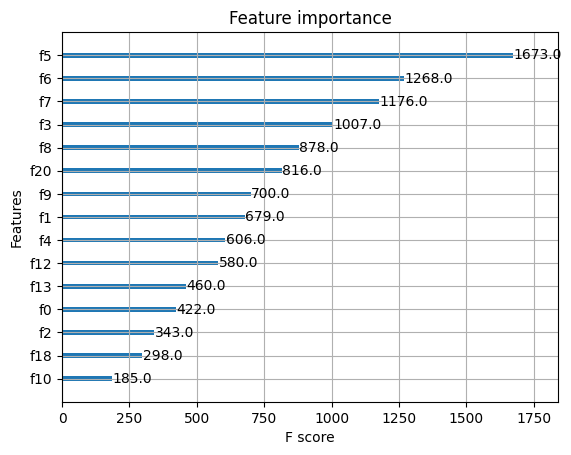

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=15, importance_type="weight")
plt.show()


In [ ]:
# Example: Predict on new sample data (replace with actual feature values)
sample_data = X_test[:5]  # Taking first 5 rows from test set
predicted_prices = xgb_model.predict(sample_data)

print("Predicted Resale Prices:", predicted_prices)

Predicted Resale Prices: [405919.3  512003.28 328835.   392595.56 279809.6 ]


Save the Model

In [ ]:
import joblib

# Save the model
model_path = "xgb_model.pkl"  # Adjust path if needed
joblib.dump(xgb_model, model_path)

print(f"✅ Model saved at: {model_path}")


✅ Model saved at: xgb_model.pkl


# Predicting 

In [ ]:
# Ensure mappings are clearly defined and correct
town_mapping = dict(df_train[['town', 'town_LE']].drop_duplicates().values)
flat_type_mapping = dict(df_train[['flat_type', 'flat_type_LE']].drop_duplicates().values)
flat_model_mapping = dict(df_train[['flat_model', 'flat_model_LE']].drop_duplicates().values)
storey_range_mapping = dict(df_train[['storey_range', 'storey_range_LE']].drop_duplicates().values)

# Verify keys clearly
print("Available towns:", list(town_mapping.keys()))
print("Available flat types:", list(flat_type_mapping.keys()))
print("Available flat models:", list(flat_model_mapping.keys()))
print("Available storey ranges:", list(storey_range_mapping.keys()))

Available towns: ['ANG MO KIO', 'BUKIT MERAH', 'SEMBAWANG', 'WOODLANDS', 'YISHUN', 'QUEENSTOWN', 'SENGKANG', 'JURONG WEST', 'BEDOK', 'GEYLANG', 'HOUGANG', 'BUKIT BATOK', 'CLEMENTI', 'TAMPINES', 'PUNGGOL', 'PASIR RIS', 'CHOA CHU KANG', 'BUKIT PANJANG', 'TOA PAYOH', 'KALLANG/WHAMPOA', 'BISHAN', 'MARINE PARADE', 'SERANGOON', 'JURONG EAST', 'CENTRAL AREA', 'BUKIT TIMAH']
Available flat types: ['4 ROOM', '5 ROOM', '2 ROOM', '3 ROOM', 'EXECUTIVE', '1 ROOM', 'MULTI-GENERATION']
Available flat models: ['New Generation', 'Standard', 'Model A', 'Simplified', 'Premium Apartment', 'Model A2', 'Improved', 'DBSS', 'Apartment', 'Maisonette', 'Adjoined flat', 'Type S1', '3Gen', 'Premium Apartment Loft', 'Model A-Maisonette', '2-room', 'Type S2', 'Multi Generation', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette']
Available storey ranges: ['04 TO 06', '01 TO 03', '10 TO 12', '07 TO 09', '22 TO 24', '13 TO 15', '19 TO 21', '16 TO 18', '31 TO 33', '28 TO 30', '34 TO 36', '25 TO 27', '43 TO 45', '3

Predict the Pricing

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Example clearly chosen default values (verify they're in your dataset explicitly):
default_town = 'ANG MO KIO' if 'ANG MO KIO' in town_mapping else list(town_mapping.keys())[0]
default_flat_type = '4 ROOM'
default_flat_model = 'New Generation'
default_storey_range = '04 TO 06'

# Widgets using Dropdowns explicitly matched to your dictionary keys
town_widget = widgets.Dropdown(
    options=list(town_mapping.keys()),
    value=default_town if (default_town := 'ANG MO KIO') in town_mapping else list(town_mapping.keys())[0],
    description="Town:"
)

flat_type_widget = widgets.Dropdown(
    options=list(flat_type_mapping.keys()),
    value=default_flat_type if (default_flat_type := '4 ROOM') in flat_type_mapping else list(flat_type_mapping.keys())[0],
    description="Flat Type:"
)

flat_model_widget = widgets.Dropdown(
    options=list(flat_model_mapping.keys()),
    value=default_model if (default_model := 'New Generation') in flat_model_mapping else list(flat_model_mapping.keys())[0],
    description="Flat Model:"
)

storey_range_widget = widgets.Dropdown(
    options=list(storey_range_mapping.keys()),
    value=default_storey_range if default_storey_range in storey_range_mapping else list(storey_range_mapping.keys())[0],
    description="Storey Range:"
)

# Numeric widgets explicitly defined
month = widgets.IntText(value=4, description="Month:")
year = widgets.IntText(value=2021, description="Year:")
floor_area_sqm = widgets.FloatText(value=91.0, description="Floor Area (sqm):")
price_per_sqm = widgets.FloatText(value=4395.60, description="Price per sqm:")
lease_commence_date = widgets.IntText(value=1981, description="Lease Start Year:")
remaining_lease = widgets.IntText(value=59, description="Remaining Lease:")
Latitude = widgets.FloatText(value=1.3758152, description="Latitude:")
Longitude = widgets.FloatText(value=103.8381722, description="Longitude:")
LTAMRTStation_within_1km = widgets.IntText(value=3, description="MRTs ≤1km:")
MallCoordinates_within_1km = widgets.IntText(value=1, description="Malls ≤1km:")
Hawker_within_1km = widgets.IntText(value=18, description="Hawkers ≤1km:")
PreSchool_within_1km = widgets.IntText(value=26, description="Preschools ≤1km:")
Primary_within_1km = widgets.IntText(value=2, description="Primary ≤1km:")
Secondary_within_1km = widgets.IntText(value=1, description="Secondary ≤1km:")
JuniorCollege_within_1km = widgets.IntText(value=1, description="JC ≤1km:")
MixedLevel_within_1km = widgets.IntText(value=1, description="Mixed Levels ≤1km:")
NParks_within_1km = widgets.IntText(value=13, description="NParks ≤1km:")
Sports_within_1km = widgets.IntText(value=0, description="Sports ≤1km:")
remaining_lease = widgets.IntText(value=59, description="Remaining Lease:")
Latitude = widgets.FloatText(value=1.3758152, description="Latitude:")
Longitude = widgets.FloatText(value=103.8381722, description="Longitude:")

# Output widget clearly defined
output = widgets.Output()

# Corrected prediction function explicitly
def predict_price(_):
    with output:
        output.clear_output()

        # Prepare user input explicitly matching the trained features
        user_input = pd.DataFrame({
            "month": [month.value],
            "year": [year.value],
            "town_LE": [town_mapping[town_widget.value]],
            "flat_type_LE": [flat_type_mapping[flat_type_widget.value]],
            "storey_range_LE": [storey_range_mapping[storey_range_widget.value]],
            "price_per_sqm": [price_per_sqm.value],
            "flat_model_LE": [flat_model_mapping[flat_model_widget.value]],
            "lease_commence_date": [lease_commence_date.value],
            "Latitude": [Latitude.value],
            "Longitude": [Longitude.value],
            "LTAMRTStation_within_1km": [LTAMRTStation_within_1km.value],
            "MallCoordinates_within_1km": [MallCoordinates_within_1km.value],
            "Hawker_within_1km": [Hawker_within_1km.value],
            "PreSchool_within_1km": [PreSchool_within_1km.value],
            "Primary_within_1km": [Primary_within_1km.value],
            "Secondary_within_1km": [Secondary_within_1km.value],
            "JuniorCollege_within_1km": [JuniorCollege_within_1km.value],
            "MixedLevel_within_1km": [MixedLevel_within_1km.value],
            "NParks_within_1km": [NParks_within_1km.value],
            "Sports_within_1km": [Sports_within_1km.value],
            "remaining_lease": [remaining_lease.value],
            "town_LE": [town_mapping[town_widget.value]],
            "flat_type_LE": [flat_type_mapping[flat_type_widget.value]],
            "storey_range_LE": [storey_range_mapping[storey_range_widget.value]],
        })

        # Align columns explicitly 
        user_input = user_input.reindex(columns=features_final, fill_value=0)

        # Make prediction clearly
        predicted_price = xgb_model.predict(user_input)

        print(f"📌 Predicted Resale Price: SGD {predicted_price[0]:,.2f}")

# Predict button
predict_button = widgets.Button(description="Predict Resale Price")
predict_button.on_click(predict_price)

# Display widgets and button clearly
widgetbox = widgets.VBox([
    month, year, town_widget, flat_type_widget, storey_range_widget,
    flat_model_widget, floor_area_sqm, price_per_sqm,
    lease_commence_date, remaining_lease, Latitude, Longitude,
    LTAMRTStation_within_1km, MallCoordinates_within_1km, Hawker_within_1km,
    PreSchool_within_1km, Primary_within_1km, Secondary_within_1km,
    JuniorCollege_within_1km, MixedLevel_within_1km, NParks_within_1km,
    Sports_within_1km, predict_button, output
])

display(widgetbox)


In [2]:
%pip install mediapipe

  Using cached cffi-1.17.1-cp312-cp312-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   --------------- ------------------------ 19.9/51.0 MB 96.9 MB/s eta 0:00:01
   ------------------------------ --------- 39.1/51.0 MB 95.6 MB/s eta 0:00:01
   ---------------------------------------  50.9/51.0 MB 89.9 MB/s eta 0:00:01
   ---------------------------------------- 51.0/51.0 MB 81.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   -------------------------------------- - 14.9/15.5 MB 72.0 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 64.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 65.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.2 MB ? eta -:--:--
   ----------- ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.6, min_tracking_confidence=0.6)  # Increased confidence
mp_drawing = mp.solutions.drawing_utils

# Initialize Camera
cap = cv2.VideoCapture(0)

# Wrist & Posture Thresholds
WRIST_ANGLE_THRESHOLD = 20  # Max wrist deviation
CONFIDENCE_THRESHOLD = 0.5  # Minimum confidence for keypoint detection
BAR_TILT_THRESHOLD = 0.05  # Max allowable difference in wrist height

def calculate_angle(a, b, c):
    """Calculate the angle between three points."""
    a = np.array(a)  # First point
    b = np.array(b)  # Middle point (joint)
    c = np.array(c)  # Last point

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    if angle > 180.0:
        angle = 360 - angle

    return angle

def check_wrist_alignment(landmarks, frame):
    """Check if the wrists are neutral and not bending backward."""
    left_wrist_conf = landmarks[mp_pose.PoseLandmark.LEFT_WRIST].visibility
    right_wrist_conf = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST].visibility

    if left_wrist_conf > CONFIDENCE_THRESHOLD and right_wrist_conf > CONFIDENCE_THRESHOLD:
        left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]
        right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW]
        left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST]
        right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_hand = landmarks[mp_pose.PoseLandmark.LEFT_INDEX]
        right_hand = landmarks[mp_pose.PoseLandmark.RIGHT_INDEX]

        # Convert to (x, y) coordinates
        left_elbow_pos = (left_elbow.x, left_elbow.y)
        right_elbow_pos = (right_elbow.x, right_elbow.y)
        left_wrist_pos = (left_wrist.x, left_wrist.y)
        right_wrist_pos = (right_wrist.x, right_wrist.y)
        left_hand_pos = (left_hand.x, left_hand.y)
        right_hand_pos = (right_hand.x, right_hand.y)

        # Calculate wrist angles
        left_wrist_angle = calculate_angle(left_elbow_pos, left_wrist_pos, left_hand_pos)
        right_wrist_angle = calculate_angle(right_elbow_pos, right_wrist_pos, right_hand_pos)

        left_wrist_bent = abs(left_wrist_angle - 180) > WRIST_ANGLE_THRESHOLD
        right_wrist_bent = abs(right_wrist_angle - 180) > WRIST_ANGLE_THRESHOLD

        # Display warnings if wrist is misaligned
        if left_wrist_bent:
            cv2.putText(frame, "?? Left wrist bent! Keep neutral!", (20, 160), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        if right_wrist_bent:
            cv2.putText(frame, "?? Right wrist bent! Keep neutral!", (20, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        cv2.putText(frame, "? Wrist keypoints not detected reliably!", (20, 240), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    
def analyze_posture(landmarks, frame):
    """Analyze overall posture (feet position, back arch, grip width)."""
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]
    left_foot = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE]
    right_foot = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE]

    # Foot Placement Check
    if abs(left_foot.y - right_foot.y) > 0.05:
        cv2.putText(frame, "?? Keep both feet flat on the ground!", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Back Arch Check
    back_arch = abs(left_hip.y - right_hip.y)
    if back_arch > 0.04:
        cv2.putText(frame, "?? Lower back arch too much!", (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

def check_bar_tilting(landmarks, frame):
    """Check if the bar is tilting (one wrist is higher than the other)."""
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW]

    # Convert to (x, y) coordinates
    left_wrist_y = left_wrist.y
    right_wrist_y = right_wrist.y
    left_elbow_y = left_elbow.y
    right_elbow_y = right_elbow.y

    # Check if the bar is tilting
    if abs(left_wrist_y - right_wrist_y) > BAR_TILT_THRESHOLD:
        leaning_side = "LEFT" if left_wrist_y > right_wrist_y else "RIGHT"
        cv2.putText(frame, f"?? Bar is tilting to the {leaning_side}! Keep it straight!",
                    (20, 280), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Check if elbows are misaligned (one is higher than the other)
    if abs(left_elbow_y - right_elbow_y) > BAR_TILT_THRESHOLD:
        leaning_side = "LEFT" if left_elbow_y > right_elbow_y else "RIGHT"
        cv2.putText(frame, f"?? Bar is uneven! Adjust {leaning_side} arm!",
                    (20, 320), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)


def process_frame(frame):
    """Process each video frame to analyze posture and wrist alignment."""
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        check_wrist_alignment(landmarks, frame)
        analyze_posture(landmarks, frame)
        check_bar_tilting(landmarks, frame)

        # Draw Pose Landmarks
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return frame

# MAIN LOOP
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame = process_frame(frame)
    cv2.imshow("Bench Press Form Correction", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()